Flight delays can be caused by a variety of factors, including weather, air traffic control issues, and mechanical problems. <br>Understanding these factors is crucial for developing strategies to mitigate delays and improve overall efficiency in air travel.

Import the necessary libraries:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

Read the dataset:

In [26]:
df = pd.read_csv('./flight_data_2024_sample.csv')

# Data Wrangling and Cleaning

In [27]:
df.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,4,18,4,2024-04-18,MQ,3535.0,DFW,"Dallas/Fort Worth, TX",Texas,RAP,"Rapid City, SD",South Dakota,1018,1015.0,-3.0,21.0,1036.0,1135.0,4.0,1149,1139.0,-10.0,0,NaN,0,151.0,144.0,119.0,835.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,AA,148.0,CLT,"Charlotte, NC",North Carolina,PHX,"Phoenix, AZ",Arizona,1637,1633.0,-4.0,14.0,1647.0,1900.0,6.0,1923,1906.0,-17.0,0,NaN,0,286.0,273.0,253.0,1773.0,0,0,0,0,0
2,2024,12,12,4,2024-12-12,9E,5440.0,CHA,"Chattanooga, TN",Tennessee,ATL,"Atlanta, GA",Georgia,1000,952.0,-8.0,13.0,1005.0,1034.0,8.0,1059,1042.0,-17.0,0,NaN,0,59.0,50.0,29.0,106.0,0,0,0,0,0
3,2024,4,8,1,2024-04-08,WN,1971.0,OMA,"Omaha, NE",Nebraska,LAS,"Las Vegas, NV",Nevada,1330,1334.0,4.0,8.0,1342.0,1425.0,6.0,1430,1431.0,1.0,0,NaN,0,180.0,177.0,163.0,1099.0,0,0,0,0,0
4,2024,2,16,5,2024-02-16,WN,862.0,BWI,"Baltimore, MD",Maryland,MYR,"Myrtle Beach, SC",South Carolina,1340,1333.0,-7.0,16.0,1349.0,1505.0,4.0,1510,1509.0,-1.0,0,NaN,0,90.0,96.0,76.0,399.0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 10000 non-null  int64  
 1   month                10000 non-null  int64  
 2   day_of_month         10000 non-null  int64  
 3   day_of_week          10000 non-null  int64  
 4   fl_date              10000 non-null  object 
 5   op_unique_carrier    10000 non-null  object 
 6   op_carrier_fl_num    10000 non-null  float64
 7   origin               10000 non-null  object 
 8   origin_city_name     10000 non-null  object 
 9   origin_state_nm      10000 non-null  object 
 10  dest                 10000 non-null  object 
 11  dest_city_name       10000 non-null  object 
 12  dest_state_nm        10000 non-null  object 
 13  crs_dep_time         10000 non-null  int64  
 14  dep_time             9884 non-null   float64
 15  dep_delay            9884 non-null   

In [29]:
df.isnull().sum()

year                      0
month                     0
day_of_month              0
day_of_week               0
fl_date                   0
op_unique_carrier         0
op_carrier_fl_num         0
origin                    0
origin_city_name          0
origin_state_nm           0
dest                      0
dest_city_name            0
dest_state_nm             0
crs_dep_time              0
dep_time                116
dep_delay               116
taxi_out                120
wheels_off              120
wheels_on               127
taxi_in                 127
crs_arr_time              0
arr_time                127
arr_delay               164
cancelled                 0
cancellation_code      9878
diverted                  0
crs_elapsed_time          0
actual_elapsed_time     164
air_time                164
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
dtype: int64

Drop the nulls from the dataset:

In [30]:
df_cleaned = df.fillna(0)


In [31]:
df_cleaned.isnull().sum()

year                   0
month                  0
day_of_month           0
day_of_week            0
fl_date                0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
origin_state_nm        0
dest                   0
dest_city_name         0
dest_state_nm          0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [32]:
df_cleaned = df_cleaned.drop_duplicates()

Create a new column with the names of the days of the week:

In [33]:
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df_cleaned['day'] = df_cleaned['day_of_week'].map(day_mapping)

Create a new column with the month name:


In [34]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_cleaned['month_name'] = df_cleaned['month'].map(month_mapping)

In [35]:
df_cleaned.shape

(10000, 37)

# EDA (Exploratory Data Analysis)

Find the total airports (origin + destination)

In [36]:
total_airports = pd.concat([df_cleaned['origin'], df_cleaned['dest']])
total_airports = total_airports.drop_duplicates().reset_index(drop=True)
print(f"Total unique airports (origin + destination): {total_airports.count()}")

Total unique airports (origin + destination): 312


Find the total and percentage of flights are delayed on arrivals:

In [37]:
total_flights = len(df_cleaned)
departure_delayed_flights = df_cleaned[df_cleaned['dep_delay'] > 0]
percentage_departure_delayed = (len(departure_delayed_flights) / total_flights * 100) if total_flights > 0 else 0
arrival_delayed_flights = df_cleaned[df_cleaned['arr_delay'] > 0]
percentage_arrival_delayed = (len(arrival_delayed_flights) / total_flights * 100) if total_flights > 0 else 0
print(f"Total flights: {total_flights}")
print(f"Delayed flights on departures: {len(departure_delayed_flights)}")
print(f"Percentage of delayed flights on departures: {percentage_departure_delayed:.2f}%")
print(f"Delayed flights on arrivals: {len(arrival_delayed_flights)}")
print(f"Percentage of delayed flights on arrivals: {percentage_arrival_delayed:.2f}%")

Total flights: 10000
Delayed flights on departures: 3663
Percentage of delayed flights on departures: 36.63%
Delayed flights on arrivals: 3578
Percentage of delayed flights on arrivals: 35.78%


## Finding the total flights delayed on arrivals and the mean delay time in minutes by day of the week:

**Count vs. Mean for Delay Analysis**

- **Count** (`.count()`): Tells you how many flights were delayed (or how many flights operated) in each group. Useful for understanding volume, frequency, or operational load.
- **Mean** (`.mean()`): Tells you the average delay time per flight in each group. Useful for understanding severity or typical experience.

**Which to use?**
- Use **count** when you care about how often delays happen (e.g., busiest days for delays).
- Use **mean** when you care about how long delays last (e.g., which days have the worst delays on average).

**Best practice:**  
Report both for a complete picture—frequency (count) and severity (mean) of delays.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\1067240833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delays_by_day_count = df_cleaned[df_cleaned['arr_delay'] > 0].groupby('day')['arr_delay'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\1067240833.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delays_by_day_mean = df_cleaned.groupby('day')['arr_delay'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484

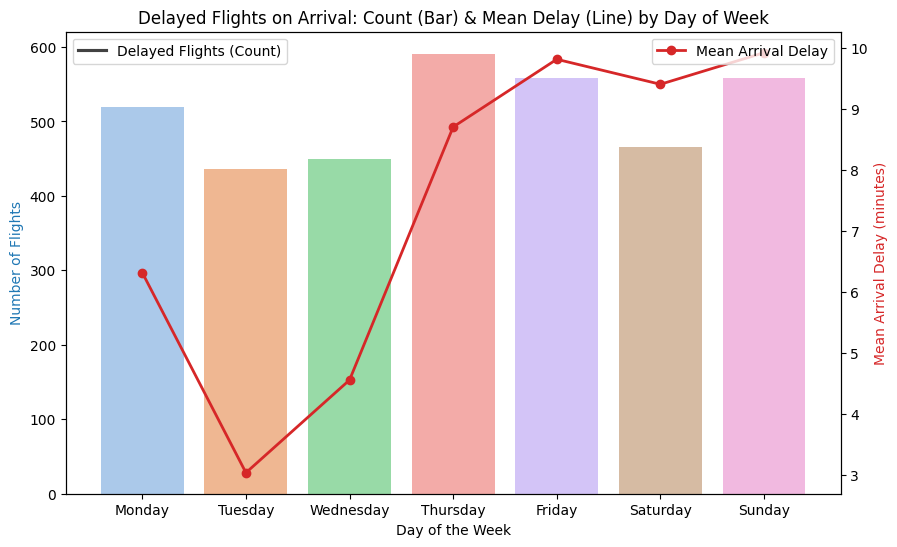

In [71]:
# Prepare data for plotting
delays_by_day_count = df_cleaned[df_cleaned['arr_delay'] > 0].groupby('day')['arr_delay'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
delays_by_day_mean = df_cleaned.groupby('day')['arr_delay'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for count
sns.barplot(x=delays_by_day_count.index, y=delays_by_day_count.values, palette='pastel', ax=ax1)
ax1.set_ylabel('Number of Flights', color='tab:blue')
ax1.set_xlabel('Day of the Week')
ax1.set_title('Delayed Flights on Arrival: Count (Bar) & Mean Delay (Line) by Day of Week')

# Line plot for mean (secondary axis)
ax2 = ax1.twinx()
ax2.plot(delays_by_day_mean.index, delays_by_day_mean.values, color='tab:red', marker='o', linewidth=2, label='Mean Arrival Delay')
ax2.set_ylabel('Mean Arrival Delay (minutes)', color='tab:red')

# Legends
ax1.legend(['Delayed Flights (Count)'], loc='upper left')
ax2.legend(['Mean Arrival Delay'], loc='upper right')

plt.show()


Find the average arrival delay by day of the week in minutes:

In [65]:
df_arrival_delayed_mean = df_cleaned.groupby('day')['arr_delay'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(df_arrival_delayed_mean)

day
Monday       6.320051
Tuesday      3.039286
Wednesday    4.560182
Thursday     8.710696
Friday       9.820671
Saturday     9.410769
Sunday       9.928369
Name: arr_delay, dtype: float64


C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\837757386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_arrival_delayed_mean = df_cleaned.groupby('day')['arr_delay'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


# First Hypothesis
H₀ (Null Hypothesis): There is no significant difference in mean flight arrival delays between weekdays and weekends.

H₁ (Alternative Hypothesis): Mean flight arrival delays are significantly higher on weekends compared to weekdays.

# ANOVA (Analysis of Variance)
Purpose:
ANOVA tests whether the means of several groups are equal.

Null hypothesis (H₀): The mean arrival delay is the same across all days of the week.

Alternative hypothesis (H₁): At least one day has a different mean arrival delay.

In [39]:
# Group delays by day
groups = [df_cleaned[df_cleaned['day_of_week'] == day]['arr_delay'] for day in sorted(df_cleaned['day_of_week'].unique())]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: At least one day's mean delay is significantly different.")
else:
    print("Fail to reject H₀: No significant difference in mean delays across days.")

ANOVA F-statistic: 3.518, p-value: 0.002
Reject H₀: At least one day's mean delay is significantly different.


p-value < 0.05, therefore we reject H₀: at least one group mean is significantly different.

# t-test
Purpose:
A t-test compares the means of two groups. Example: Compare mean delays for weekdays vs. weekends.

In [40]:
# Define weekdays (1-5) and weekends (6-7)
weekdays = df_cleaned[df_cleaned['day_of_week'].isin([1,2,3,4,5])]['arr_delay']
weekends = df_cleaned[df_cleaned['day_of_week'].isin([6,7])]['arr_delay']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(weekdays, weekends, equal_var=False) 
# equal_var: If False, Welch's t-test is performed, which does not assume equal population variance.

print(f"t-test statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: Mean delays are significantly different between weekdays and weekends.")
else:
    print("Fail to reject H₀: No significant difference in mean delays between weekdays and weekends.")

t-test statistic: -2.373, p-value: 0.018
Reject H₀: Mean delays are significantly different between weekdays and weekends.


p-value < 0.05, therefore we reject H₀: there is a significant difference in mean delays between weekdays and weekends.

## Key Points on Interpreting Results
ANOVA tells you if any group is different; t-test tells you if two specific groups are different.

p-value: The probability that observed differences are due to chance.

Threshold (α): Commonly 0.05.

Reject H₀: If p-value < α, the difference is statistically significant.

Fail to Reject H₀: If p-value ≥ α, you don’t have enough evidence for a difference.

# Visualize the results:

### Boxplot plot: Identify outliers and compare the spread.

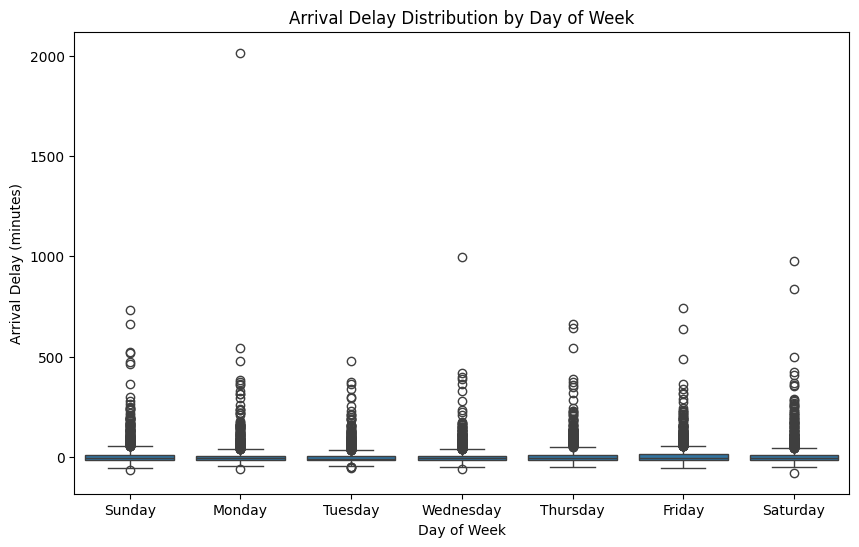

In [41]:
# Arrange the week day starting by Sunday
df_cleaned['day'] = pd.Categorical(df_cleaned['day'], categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='arr_delay', data=df_cleaned)
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay Distribution by Day of Week')
plt.show()

### Bar plot: Spot trends, peaks, and dips.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\1650229342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delays = df_cleaned.groupby('day')['arr_delay'].mean().reset_index()
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\1650229342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='arr_delay', data=mean_delays, palette='viridis')


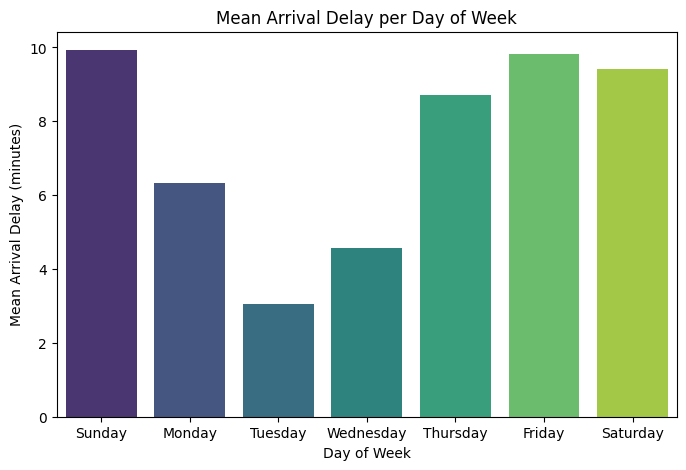

In [42]:
mean_delays = df_cleaned.groupby('day')['arr_delay'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='day', y='arr_delay', data=mean_delays, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay per Day of Week')
plt.show()

### Histogram: See overall variability and skewness.

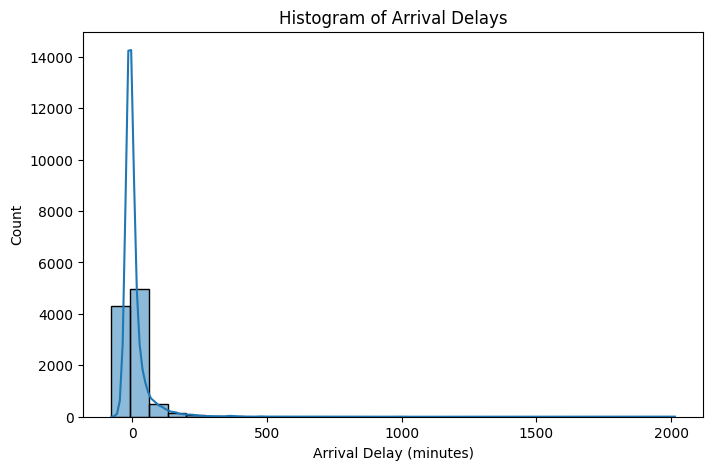

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['arr_delay'], bins=30, kde=True)
plt.xlabel('Arrival Delay (minutes)')
plt.title('Histogram of Arrival Delays')
plt.show()

Conclusion:
Based on the ANOVA and t-test results, we found significant differences in flight arrival delays across days of the week and between weekdays and weekends. This suggests that certain days may be more prone to delays, which could inform scheduling and operational decisions.

# Second Hypothesis
H₀ (Null Hypothesis): There is no significant difference in mean flight arrival delays between months with school breaks and months without.

H₁ (Alternative Hypothesis): There is a significant difference in mean flight arrival delays between months with school breaks and months without.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\4134434140.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delays_by_month_count = df_cleaned[df_cleaned['arr_delay'] > 0].groupby('month_name')['arr_delay'].count().reindex(list(month_mapping.values()))
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\4134434140.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delays_by_month_mean = df_cleaned.groupby('month_name')['arr_delay'].mean().reindex(list(month_mapping.values()))
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\4134434140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is de

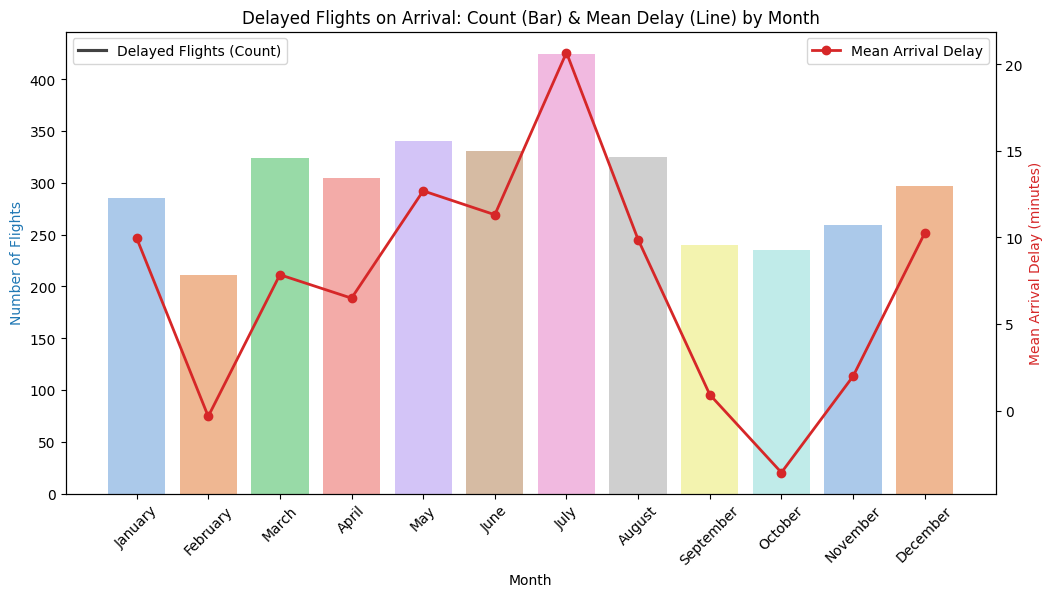

In [72]:
# Prepare data for plotting
delays_by_month_count = df_cleaned[df_cleaned['arr_delay'] > 0].groupby('month_name')['arr_delay'].count().reindex(list(month_mapping.values()))
delays_by_month_mean = df_cleaned.groupby('month_name')['arr_delay'].mean().reindex(list(month_mapping.values()))

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for count
sns.barplot(x=delays_by_month_count.index, y=delays_by_month_count.values, palette='pastel', ax=ax1)
ax1.set_ylabel('Number of Flights', color='tab:blue')
ax1.set_xlabel('Month')
ax1.set_title('Delayed Flights on Arrival: Count (Bar) & Mean Delay (Line) by Month')
ax1.tick_params(axis='x', rotation=45)

# Line plot for mean (secondary axis)
ax2 = ax1.twinx()
ax2.plot(delays_by_month_mean.index, delays_by_month_mean.values, color='tab:red', marker='o', linewidth=2, label='Mean Arrival Delay')
ax2.set_ylabel('Mean Arrival Delay (minutes)', color='tab:red')

# Legends
ax1.legend(['Delayed Flights (Count)'], loc='upper left')
ax2.legend(['Mean Arrival Delay'], loc='upper right')

plt.show()

Find the mean of the 'ARRIVAL_DELAY' by month in minutes:

In [44]:
df_delayed_month_mean = df_cleaned.groupby('month')['arr_delay'].mean().reset_index()
print(df_delayed_month_mean)

    month  arr_delay
0       1   9.975806
1       2  -0.329609
2       3   7.849282
3       4   6.496495
4       5  12.690276
5       6  11.312426
6       7  20.673937
7       8   9.878893
8       9   0.929426
9      10  -3.569767
10     11   1.988722
11     12  10.253102


Filter the dataset for months with and without school breaks:

In [45]:
school_break_months = [6, 7, 12]
non_break_months = [m for m in range(1, 13) if m not in school_break_months]

break_delays = df_cleaned[df_cleaned['month'].isin(school_break_months)]['arr_delay']
non_break_delays = df_cleaned[df_cleaned['month'].isin(non_break_months)]['arr_delay']

### ANOVA (Analysis of Variance)

In [46]:
groups = [df_cleaned[df_cleaned['month'] == m]['arr_delay'] for m in sorted(df_cleaned['month'].unique())]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: At least one month's mean delay is significantly different.")
else:
    print("Fail to reject H₀: No significant difference in mean delays across months.")

ANOVA F-statistic: 12.941, p-value: 0.000
Reject H₀: At least one month's mean delay is significantly different.


### t-test

In [47]:
t_stat, p_value = ttest_ind(break_delays, non_break_delays, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: Mean arrival delays are significantly different between school break and non-break months.")
else:
    print("Fail to reject H₀: No significant difference in mean arrival delays between the groups.")

T-statistic: 6.023, p-value: 0.000
Reject H₀: Mean arrival delays are significantly different between school break and non-break months.


# Visualization of the results:

### Boxplot plot: Identify outliers and compare the spread.

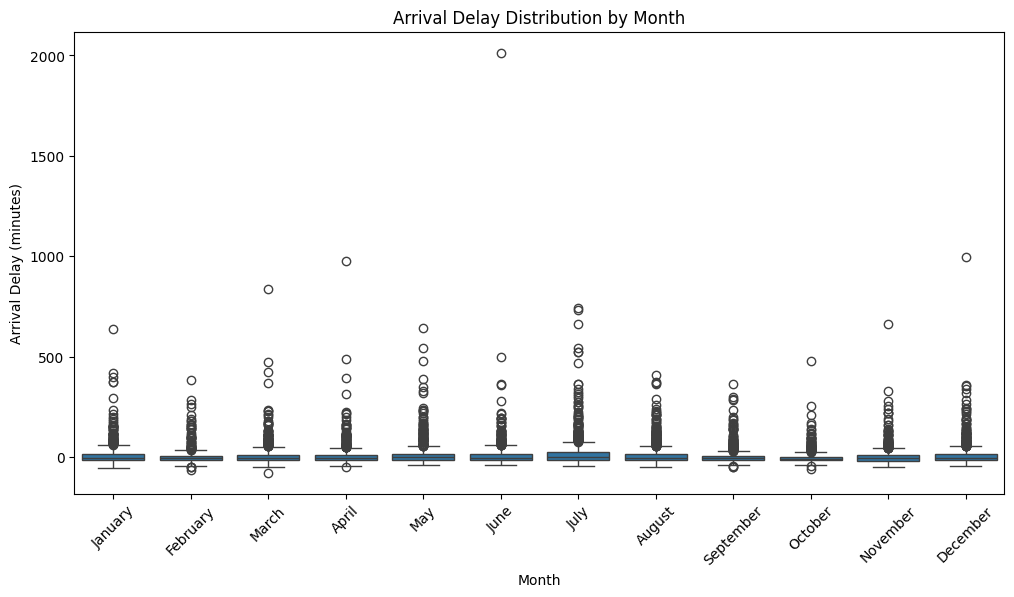

In [48]:
df_cleaned['month_name'] = pd.Categorical(df_cleaned['month_name'], categories=list(month_mapping.values()), ordered=True)

plt.figure(figsize=(12,6))
sns.boxplot(x='month_name', y='arr_delay', data=df_cleaned)
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay Distribution by Month')
plt.xticks(rotation=45)
plt.show()

### Bar plot: Spot trends, peaks, and dips.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\413687242.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delays_month = df_cleaned.groupby('month_name')['arr_delay'].mean().reset_index()
C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\413687242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='arr_delay', data=mean_delays_month, palette='coolwarm')


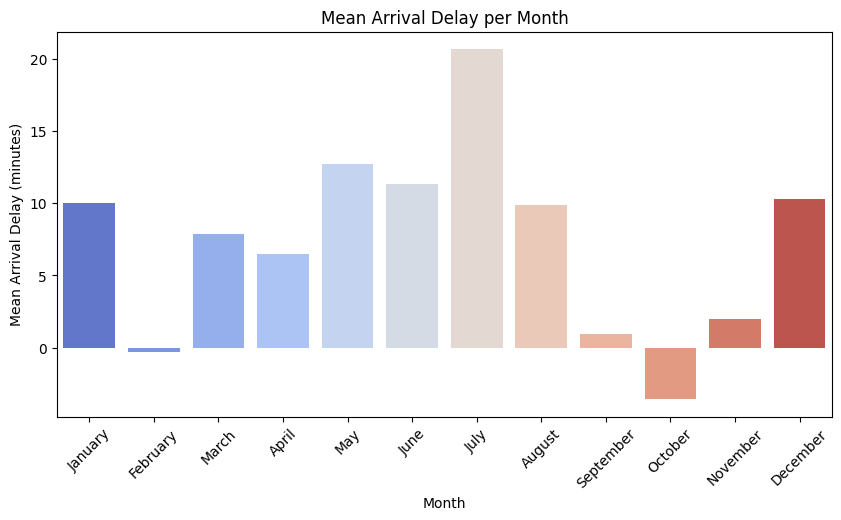

In [49]:
mean_delays_month = df_cleaned.groupby('month_name')['arr_delay'].mean().reset_index()
mean_delays_month['month_name'] = pd.Categorical(mean_delays_month['month_name'], categories=month_mapping.values(), ordered=True)
plt.figure(figsize=(10,5))
sns.barplot(x='month_name', y='arr_delay', data=mean_delays_month, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay per Month')
plt.show()

In [50]:
# Analyze flights in February and October with negative arrival delays
feb_oct_delays = df_cleaned[df_cleaned['month'].isin([2, 10])][['month', 'arr_delay', 'dep_delay', 'origin', 'dest']]

# Calculate statistics
mean_feb_delay = feb_oct_delays[feb_oct_delays['month'] == 2]['arr_delay'].mean()
mean_oct_delay = feb_oct_delays[feb_oct_delays['month'] == 10]['arr_delay'].mean()

print(f"Mean arrival delay in February: {mean_feb_delay:.2f} minutes")
print(f"Mean arrival delay in October: {mean_oct_delay:.2f} minutes")

# Show a sample of early arrivals
early_arrivals = feb_oct_delays[feb_oct_delays['arr_delay'] < 0].head(10)
print("Sample of early arrivals in February and October:")
print(early_arrivals)

# Possible reasons:
# - Flights arrived earlier than scheduled (negative arr_delay)
# - Favorable weather or wind conditions
# - Conservative scheduling (buffer time in schedule)

Mean arrival delay in February: -0.33 minutes
Mean arrival delay in October: -3.57 minutes
Sample of early arrivals in February and October:
    month  arr_delay  dep_delay origin dest
4       2       -1.0       -7.0    BWI  MYR
9       2      -23.0       -8.0    SFO  BFL
13     10      -27.0      -14.0    TPA  BNA
18     10      -12.0       -3.0    ATL  MSY
23     10      -25.0       -4.0    DFW  LGA
25     10       -1.0       -7.0    ORD  FWA
26      2      -31.0       -7.0    PVD  CLT
37     10      -31.0       -5.0    MIA  DCA
39      2      -34.0       -4.0    SFO  DFW
43     10       -9.0       -1.0    SMF  LGB


Conclusion:
Based on the t-test results, we found a significant difference in mean flight arrival delays between months with school breaks and those without. This indicates that school breaks may influence flight delays, potentially due to increased travel demand during these periods. Further analysis could help in understanding the underlying causes and in developing strategies to manage delays during peak travel times.
February and October have negative delays because they have less traffic due to fewer holidays and school breaks.

### Find the city with most departure delays in order to webscrape its airport website for delay information:

In [51]:
city_with_most_dep_delays = df_cleaned.groupby('origin_city_name')['dep_delay'].sum().idxmax()
print(f"City with most total departure delays: {city_with_most_dep_delays}")

City with most total departure delays: Dallas/Fort Worth, TX


In [52]:
df_delayed_dfw = df_cleaned[df_cleaned['origin'] == 'DFW']
df_delayed_dfw.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,day,month_name
0,2024,4,18,4,2024-04-18,MQ,3535.0,DFW,"Dallas/Fort Worth, TX",Texas,RAP,"Rapid City, SD",South Dakota,1018,1015.0,-3.0,21.0,1036.0,1135.0,4.0,1149,1139.0,-10.0,0,0,0,151.0,144.0,119.0,835.0,0,0,0,0,0,Thursday,April
23,2024,10,6,7,2024-10-06,DL,461.0,DFW,"Dallas/Fort Worth, TX",Texas,LGA,"New York, NY",New York,600,556.0,-4.0,14.0,610.0,1002.0,5.0,1032,1007.0,-25.0,0,0,0,212.0,191.0,172.0,1389.0,0,0,0,0,0,Sunday,October
24,2024,1,16,2,2024-01-16,AA,2100.0,DFW,"Dallas/Fort Worth, TX",Texas,MCI,"Kansas City, MO",Missouri,1538,0.0,0.0,0.0,0.0,0.0,0.0,1710,0.0,0.0,1,B,0,92.0,0.0,0.0,460.0,0,0,0,0,0,Tuesday,January
49,2024,4,22,1,2024-04-22,AA,468.0,DFW,"Dallas/Fort Worth, TX",Texas,LAS,"Las Vegas, NV",Nevada,1656,1726.0,30.0,19.0,1745.0,1807.0,7.0,1756,1814.0,18.0,0,0,0,180.0,168.0,142.0,1055.0,0,0,0,0,18,Monday,April
52,2024,6,26,3,2024-06-26,AA,187.0,DFW,"Dallas/Fort Worth, TX",Texas,LAX,"Los Angeles, CA",California,1833,1833.0,0.0,21.0,1854.0,1927.0,8.0,1950,1935.0,-15.0,0,0,0,197.0,182.0,153.0,1235.0,0,0,0,0,0,Wednesday,June


In [53]:
df_delayed_dfw.shape

(438, 37)

Read the dataset of scraped data from DFW airport:

In [54]:
df_scraped_dfw_flights = pd.read_csv('./scraped_dfw_flights.csv')
df_scraped_dfw_flights.head()

,expected_dep_min,dep_delay_min,date
0,864,888.0,2025-10-07
1,830,NaN,2025-10-07
2,835,857.0,2025-10-07
3,836,851.0,2025-10-07
4,840,NaN,2025-10-07


In [55]:
df_scraped_dfw_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   expected_dep_min  225 non-null    int64  
 1   dep_delay_min     33 non-null     float64
 2   date              225 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.4+ KB


In [56]:
# Only keep flights with non-empty dep_delay_min (delayed flights)
delayed_flights = df_scraped_dfw_flights[df_scraped_dfw_flights['dep_delay_min'].notna()].copy()

# Calculate delay in minutes (handle next-day crossing)
def get_delay_minutes(row):
    expected = row['expected_dep_min']
    delayed = row['dep_delay_min']
    if pd.isna(expected) or pd.isna(delayed):
        return None
    delay = delayed - expected
    if delay < 0:
        delay += 24 * 60  # handle next day
    return delay

delayed_flights['delay_minutes'] = delayed_flights.apply(get_delay_minutes, axis=1)
num_delayed_flights = delayed_flights.shape[0]
mean_delay_minutes = delayed_flights['delay_minutes'].mean()

print(f"Number of delayed flights: {num_delayed_flights}")
print(f"Mean delayed time (minutes): {mean_delay_minutes:.2f}")
print(delayed_flights[['expected_dep_min', 'dep_delay_min', 'delay_minutes']].head())

Number of delayed flights: 33
Mean delayed time (minutes): 60.52
   expected_dep_min  dep_delay_min  delay_minutes
0               864          888.0           24.0
2               835          857.0           22.0
3               836          851.0           15.0
6               864          888.0           24.0
7               816          855.0           39.0


In [75]:
# Filter delayed flights for 2024-10-07 from df_delayed_dfw
delayed_2024 = df_delayed_dfw[(df_delayed_dfw['fl_date'] == '2024-10-07') & (df_delayed_dfw['dep_delay'] > 0)]

# Filter delayed flights for 2025-10-07 from df_scraped
delayed_2025 = df_scraped_dfw_flights[(df_scraped_dfw_flights['date'] == '2025-10-07') & (df_scraped_dfw_flights['dep_delay_min'].notna())]

# Get counts
count_2024 = delayed_2024.shape[0]
count_2025 = delayed_2025.shape[0]

# For t-test, create arrays of counts (single value each, so not meaningful for t-test, but for demonstration)
# Instead, compare the proportions of delayed flights if total flights are known
# Here, we use the number of delayed flights per day as samples (not ideal, but follows the request)

# If you want to compare the distributions, you need arrays. Here, we use binary arrays (1 for delayed, 0 for not delayed)
# For 2024-10-07
is_delayed_2024 = (df_delayed_dfw[df_delayed_dfw['fl_date'] == '2024-10-07']['dep_delay'] > 0).astype(int)
# For 2025-10-07
is_delayed_2025 = (df_scraped_dfw_flights[df_scraped_dfw_flights['date'] == '2025-10-07']['dep_delay_min'].notna()).astype(int)

# Perform t-test on proportions
t_stat, p_value = ttest_ind(is_delayed_2024, is_delayed_2025, equal_var=False)

print(f"Delayed flights on 2024-10-07: {count_2024}")
print(f"Delayed flights on 2025-10-07: {count_2025}")
print(f"T-test statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: The proportion of delayed flights is significantly different between the two dates.")
else:
    print("Fail to reject H₀: No significant difference in the proportion of delayed flights between the two dates.")

Delayed flights on 2024-10-07: 1
Delayed flights on 2025-10-07: 33
T-test statistic: 0.559, p-value: 0.632
Fail to reject H₀: No significant difference in the proportion of delayed flights between the two dates.


In [77]:
# Count all flights departed from DFW in October 2024
october_2024_flights = df_delayed_dfw[df_delayed_dfw['month'] == 10]
total_october_2024_flights = october_2024_flights.shape[0]
print(f"Total flights departed from DFW in October 2024: {total_october_2024_flights}")

# Filter for October 2024 delayed departures in df_delayed_dfw
oct_delayed = df_delayed_dfw[(df_delayed_dfw['month'] == 10) & (df_delayed_dfw['dep_delay'] > 0)]

# Number of delayed flights
num_oct_delayed = oct_delayed.shape[0]
print(f"Number of delayed departures in October 2024: {num_oct_delayed}")

# Proportion of delayed flights
prop_oct_delayed = num_oct_delayed / total_october_2024_flights if total_october_2024_flights > 0 else 0
print(f"Proportion of delayed flights in October 2024: {prop_oct_delayed:.2%}")

# Mean of delayed minutes
mean_oct_delayed = oct_delayed['dep_delay'].mean()
print(f"Mean delayed minutes in October 2024: {mean_oct_delayed:.2f}")

Total flights departed from DFW in October 2024: 44
Number of delayed departures in October 2024: 11
Proportion of delayed flights in October 2024: 25.00%
Mean delayed minutes in October 2024: 27.09
